In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
ames = pd.read_csv('data/train.csv')

In [4]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
ames.shape

(1460, 81)

In [6]:
all_column_names = [ list(ames.columns[i:i+5]) for i in range(0,81,5) ]
for acn in all_column_names:
    print("\t".join(acn))

Id	MSSubClass	MSZoning	LotFrontage	LotArea
Street	Alley	LotShape	LandContour	Utilities
LotConfig	LandSlope	Neighborhood	Condition1	Condition2
BldgType	HouseStyle	OverallQual	OverallCond	YearBuilt
YearRemodAdd	RoofStyle	RoofMatl	Exterior1st	Exterior2nd
MasVnrType	MasVnrArea	ExterQual	ExterCond	Foundation
BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1	BsmtFinSF1
BsmtFinType2	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	Heating
HeatingQC	CentralAir	Electrical	1stFlrSF	2ndFlrSF
LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath
HalfBath	BedroomAbvGr	KitchenAbvGr	KitchenQual	TotRmsAbvGrd
Functional	Fireplaces	FireplaceQu	GarageType	GarageYrBlt
GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond
PavedDrive	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch
ScreenPorch	PoolArea	PoolQC	Fence	MiscFeature
MiscVal	MoSold	YrSold	SaleType	SaleCondition
SalePrice


### Study each Attribute/Feature one by one  
basic idea about each feature is extracted from *data_description.txt*

In [7]:
# List for columns to be dropped.
droplist = []
numerical_features = []
ordinal_features = []
nominal_features = []

Miscellaneous Tasks:  
  
* Convert MSSubClass from ordinal to nominal.


**Id**  
It is irrelevant to pricing. Better be dropped.

In [8]:
droplist.append("Id")

**MSSubClass**  
categorical variable in numerical format. Either it is ordinal or need to be one hot encoded if nominal. This can be determined by checking if increased values of MSSubClass increases or decreases price.

In [9]:
# Missing Values
ames['MSSubClass'].isnull().sum()

0

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


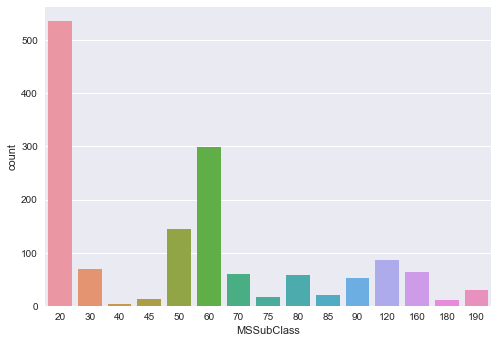

In [10]:
sns.countplot(ames['MSSubClass'])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


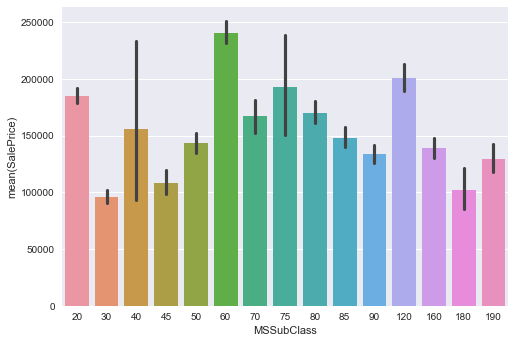

In [11]:
sns.barplot(ames['MSSubClass'], ames['SalePrice'])

It is nominal feature but represented as ordinal one. Needs to be corrected. Also, it doesn't have much correlation with SalePrice.

**MSZoning**  
Nominal feature.

In [12]:
ames['MSZoning'].isnull().sum()

0

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


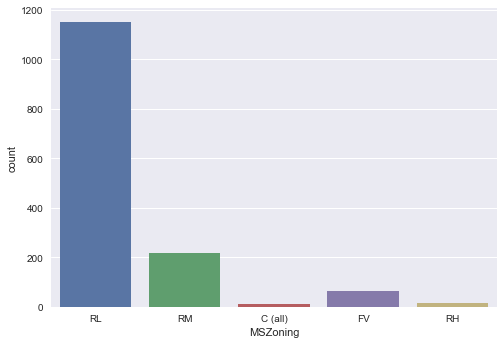

In [13]:
sns.countplot(ames['MSZoning'])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


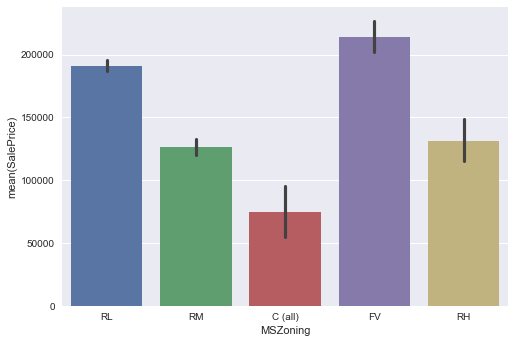

In [14]:
sns.barplot(ames['MSZoning'], ames['SalePrice'])